# MACD mix SMA cross - Strategy - Backtesting 

In [ ]:
## Clone strategy from QMtrade

### Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')
#
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
from backtesting.backtesting import Backtest, Strategy
# from backtesting._plotting import set_bokeh_output
# set_bokeh_output(notebook=False)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

Loading BokehJS ...

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
data = data[data.index > '2020-11-01 00:00:00']
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
# data = data[data.index > '2024-11-01 00:00:00']

In [5]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2025-10-21 14:10:00,1927.5,1933.0,1918.7,1922.0,16658
2025-10-21 14:15:00,1922.0,1927.5,1919.2,1921.5,8361
2025-10-21 14:20:00,1921.5,1926.0,1902.9,1906.7,16009


In [6]:
def cal_signal(r):
    signal = ''
    if r['SMA_10'] > r['SMA_20'] and r["MACDh_shif1"] < 0 and r["MACDh_12_26_9"] > 0:
        signal = 'long'
    elif r['SMA_10'] < r['SMA_20'] or (r["MACDh_shif1"] > 0 and r["MACDh_12_26_9"] < 0):
        signal = 'close'
    return signal

def prepare_data(df):
    df["SMA_10"] = ta.sma(df["Close"], length=10)
    df["SMA_20"] = ta.sma(df["Close"], length=20)
    macd = ta.macd(df["Close"], fast=12, slow=26, signal=9)
    df = pd.concat([df, macd], axis=1)
    df["MACDh_shif1"] = df["MACDh_12_26_9"].shift(1)
    df['signal'] = df.apply(lambda r: cal_signal(r), axis=1)
    return df

In [14]:
prepared_data = prepare_data(data)
prepared_data.dropna(inplace=True)

,Open,High,Low,Close,Volume,SMA_10,SMA_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACDh_shif1,signal
Date,,,,,,,,,,,,
2020-11-04 13:55:00,912.8,917.2,912.5,916.3,5238,913.48,913.270,0.872273,0.027810,0.844463,-0.175762,long
2020-11-10 13:45:00,929.3,932.0,929.3,931.0,5535,929.43,929.075,0.400519,0.035240,0.365279,-0.078847,long
2020-11-13 13:00:00,929.2,931.3,929.2,930.7,5894,928.63,928.395,0.614486,0.097242,0.517244,-0.025128,long
2020-11-13 13:50:00,930.6,931.7,930.3,931.7,1771,931.03,929.830,0.900552,0.026834,0.873718,-0.006810,long
2020-11-16 13:55:00,928.2,933.8,928.2,933.5,5450,932.16,931.165,-0.920680,0.173092,-1.093772,-0.052250,long
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-10 13:00:00,1949.7,1951.8,1948.6,1951.3,4952,1947.69,1946.020,2.934664,0.120331,2.814333,-0.009509,long
2025-10-10 14:15:00,1955.9,1964.8,1954.2,1962.2,12633,1958.87,1955.105,4.127534,0.018301,4.109233,-0.086167,long
2025-10-13 09:20:00,1970.2,1972.0,1969.1,1971.5,4248,1966.94,1962.495,5.138816,0.111379,5.027437,-0.033196,long


In [15]:
prepared_data[prepared_data.signal == "long"]

,Open,High,Low,Close,Volume,SMA_10,SMA_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACDh_shif1,signal
Date,,,,,,,,,,,,
2020-11-04 13:55:00,912.8,917.2,912.5,916.3,5238,913.48,913.270,0.872273,0.027810,0.844463,-0.175762,long
2020-11-10 13:45:00,929.3,932.0,929.3,931.0,5535,929.43,929.075,0.400519,0.035240,0.365279,-0.078847,long
2020-11-13 13:00:00,929.2,931.3,929.2,930.7,5894,928.63,928.395,0.614486,0.097242,0.517244,-0.025128,long
2020-11-13 13:50:00,930.6,931.7,930.3,931.7,1771,931.03,929.830,0.900552,0.026834,0.873718,-0.006810,long
2020-11-16 13:55:00,928.2,933.8,928.2,933.5,5450,932.16,931.165,-0.920680,0.173092,-1.093772,-0.052250,long
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-10 13:00:00,1949.7,1951.8,1948.6,1951.3,4952,1947.69,1946.020,2.934664,0.120331,2.814333,-0.009509,long
2025-10-10 14:15:00,1955.9,1964.8,1954.2,1962.2,12633,1958.87,1955.105,4.127534,0.018301,4.109233,-0.086167,long
2025-10-13 09:20:00,1970.2,1972.0,1969.1,1971.5,4248,1966.94,1962.495,5.138816,0.111379,5.027437,-0.033196,long


In [16]:
class MainStrategy(Strategy):
    SL = 5
    reward_on_risk = 3
    def init(self):
        self._broker._cash = 4500
        super().init()

    def next(self):
        super().next()
        _time = self.data.index
        current_time = _time[-1]

        signal = self.data.signal[-1]
        close_price = self.data.Close[-1]
        open_price = self.data.Open[-1]
        if not self.position:
            if signal == 'long':
                buy_price = close_price
                sl = buy_price - self.SL
                tp = buy_price + self.SL * self.reward_on_risk
                # self.buy(size=1, sl=sl, tp=tp)
                self.buy(size=1, sl=sl, tp=tp)
        else:
            if signal == 'close':
                self.position.close()

In [17]:
bt = Backtest(prepared_data, MainStrategy, commission=.0003, exclusive_orders=True)
stats = bt.run()

In [18]:
stats

Start                     2020-11-02 13:15:00
End                       2025-10-21 14:45:00
Duration                   1814 days 01:30:00
Exposure Time [%]                     8.55345
Equity Final [$]                   4467.88175
Equity Peak [$]                    4579.23174
Commissions [$]                     513.81825
Return [%]                           -0.71374
Buy & Hold Return [%]               111.86308
Return (Ann.) [%]                    -0.14546
Volatility (Ann.) [%]                 1.46438
CAGR [%]                             -0.09945
Sharpe Ratio                         -0.09934
Sortino Ratio                        -0.16243
Calmar Ratio                         -0.03814
Alpha [%]                            -2.54387
Beta                                  0.01636
Max. Drawdown [%]                    -3.81436
Avg. Drawdown [%]                    -0.39767
Max. Drawdown Duration     1419 days 01:40:00
Avg. Drawdown Duration       81 days 19:32:00
# Trades                          

In [19]:
stats['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,SL,TP,PnL,Commission,ReturnPct,EntryTime,ExitTime,Duration,Tag
0,1,111,115,916.6,911.3,911.3,931.3,-5.84837,0.54837,-0.006381,2020-11-04 14:00:00,2020-11-04 14:20:00,0 days 00:20:00,None
1,1,313,318,931.2,928.5,926.0,946.0,-3.25791,0.55791,-0.003499,2020-11-10 13:50:00,2020-11-10 14:15:00,0 days 00:25:00,None
2,1,455,464,930.9,930.6,925.7,945.7,-0.85845,0.55845,-0.000922,2020-11-13 13:05:00,2020-11-13 13:50:00,0 days 00:45:00,None
3,1,465,484,931.6,940.3,926.7,946.7,8.13843,0.56157,0.008736,2020-11-13 13:55:00,2020-11-16 09:50:00,2 days 19:55:00,None
4,1,517,518,933.4,928.5,928.5,948.5,-5.45857,0.55857,-0.005848,2020-11-16 14:00:00,2020-11-16 14:05:00,0 days 00:05:00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,1,62561,62575,1951.3,1955.9,1946.3,1966.3,3.42784,1.17216,0.001757,2025-10-10 13:05:00,2025-10-10 14:15:00,0 days 01:10:00,None
654,1,62576,62582,1962.2,1965.0,1957.2,1977.2,1.62184,1.17816,0.000827,2025-10-10 14:20:00,2025-10-13 09:15:00,2 days 18:55:00,None
655,1,62584,62590,1971.5,1973.2,1966.5,1986.5,0.51659,1.18341,0.000262,2025-10-13 09:25:00,2025-10-13 09:55:00,0 days 00:30:00,None
656,1,62609,62614,1985.0,1983.8,1979.9,1999.9,-2.39064,1.19064,-0.001204,2025-10-13 13:00:00,2025-10-13 13:25:00,0 days 00:25:00,None


In [20]:
# bt.plot()

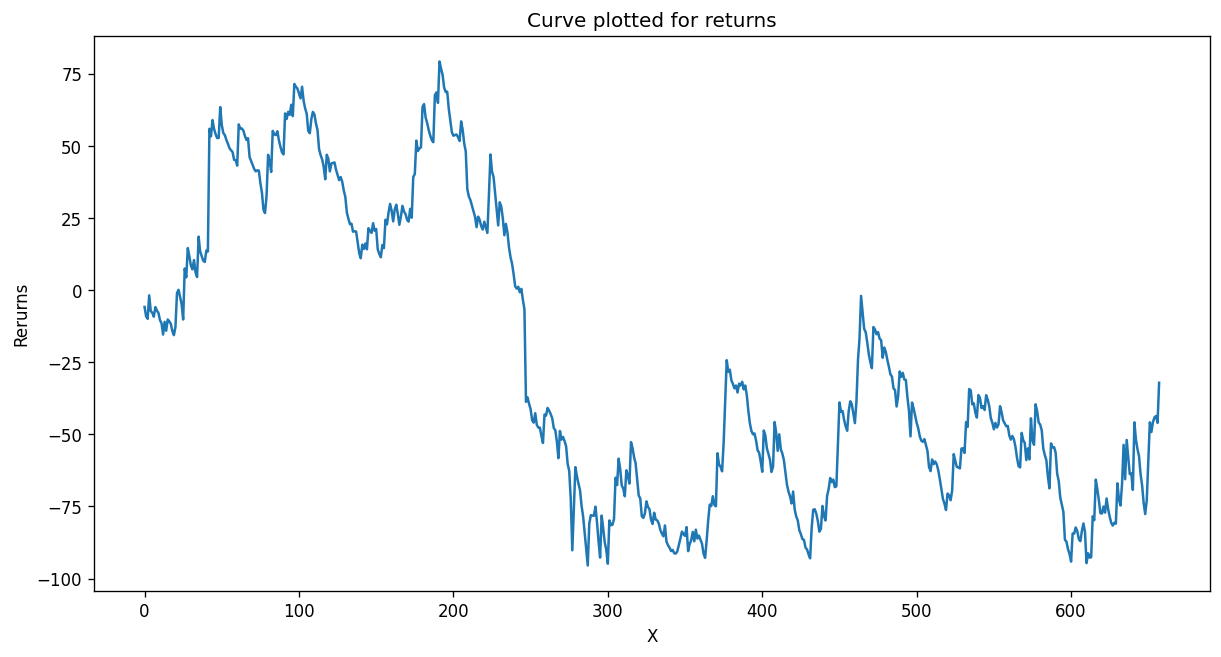

In [21]:
copy_trades = stats['_trades'].copy()
copy_trades['cum_sum'] = copy_trades['PnL'].cumsum()
X = np.array(range(0, len(copy_trades['cum_sum'])))
Y = copy_trades['cum_sum']
# Plotting the Graph
plt.plot(X, Y)
plt.title("Curve plotted for returns")
plt.xlabel("X")
plt.ylabel("Rerurns")
plt.show()